In [ ]:
import scanpy as sc
import scanpy as sc
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
from matplotlib import font_manager as fm
import decoupler as dc
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import pandas as pd

In [18]:
adata = sc.read_h5ad("/home/icb/raphael.kfuri-rubens/data/yumm_analysis/anndata_files/immunity_dc_revision_annotation_v6.h5ad")

In [6]:
adata.obs["annotation_v6"] = adata.obs["annotation_v6"].astype(str)
adata.obs["annotation_v6"] = adata.obs["annotation_v6"].replace("CCR7+ DCs", "CCR7$^+$ DCs")
adata.obs["annotation_v6"] = adata.obs["annotation_v6"].replace("ISG15+ Monocytes", "ISG15$^+$ Monocytes")
adata.obs["annotation_v6"] = adata.obs["annotation_v6"].replace("CD8+ T Cells", "CD8$^+$ T cells")
adata.obs["annotation_v6"] = adata.obs["annotation_v6"].replace("Conventional CD4+ T cells", "Conventional CD4$^+$ T cells")
adata.obs["annotation_v6"] = adata.obs["annotation_v6"].astype("category")

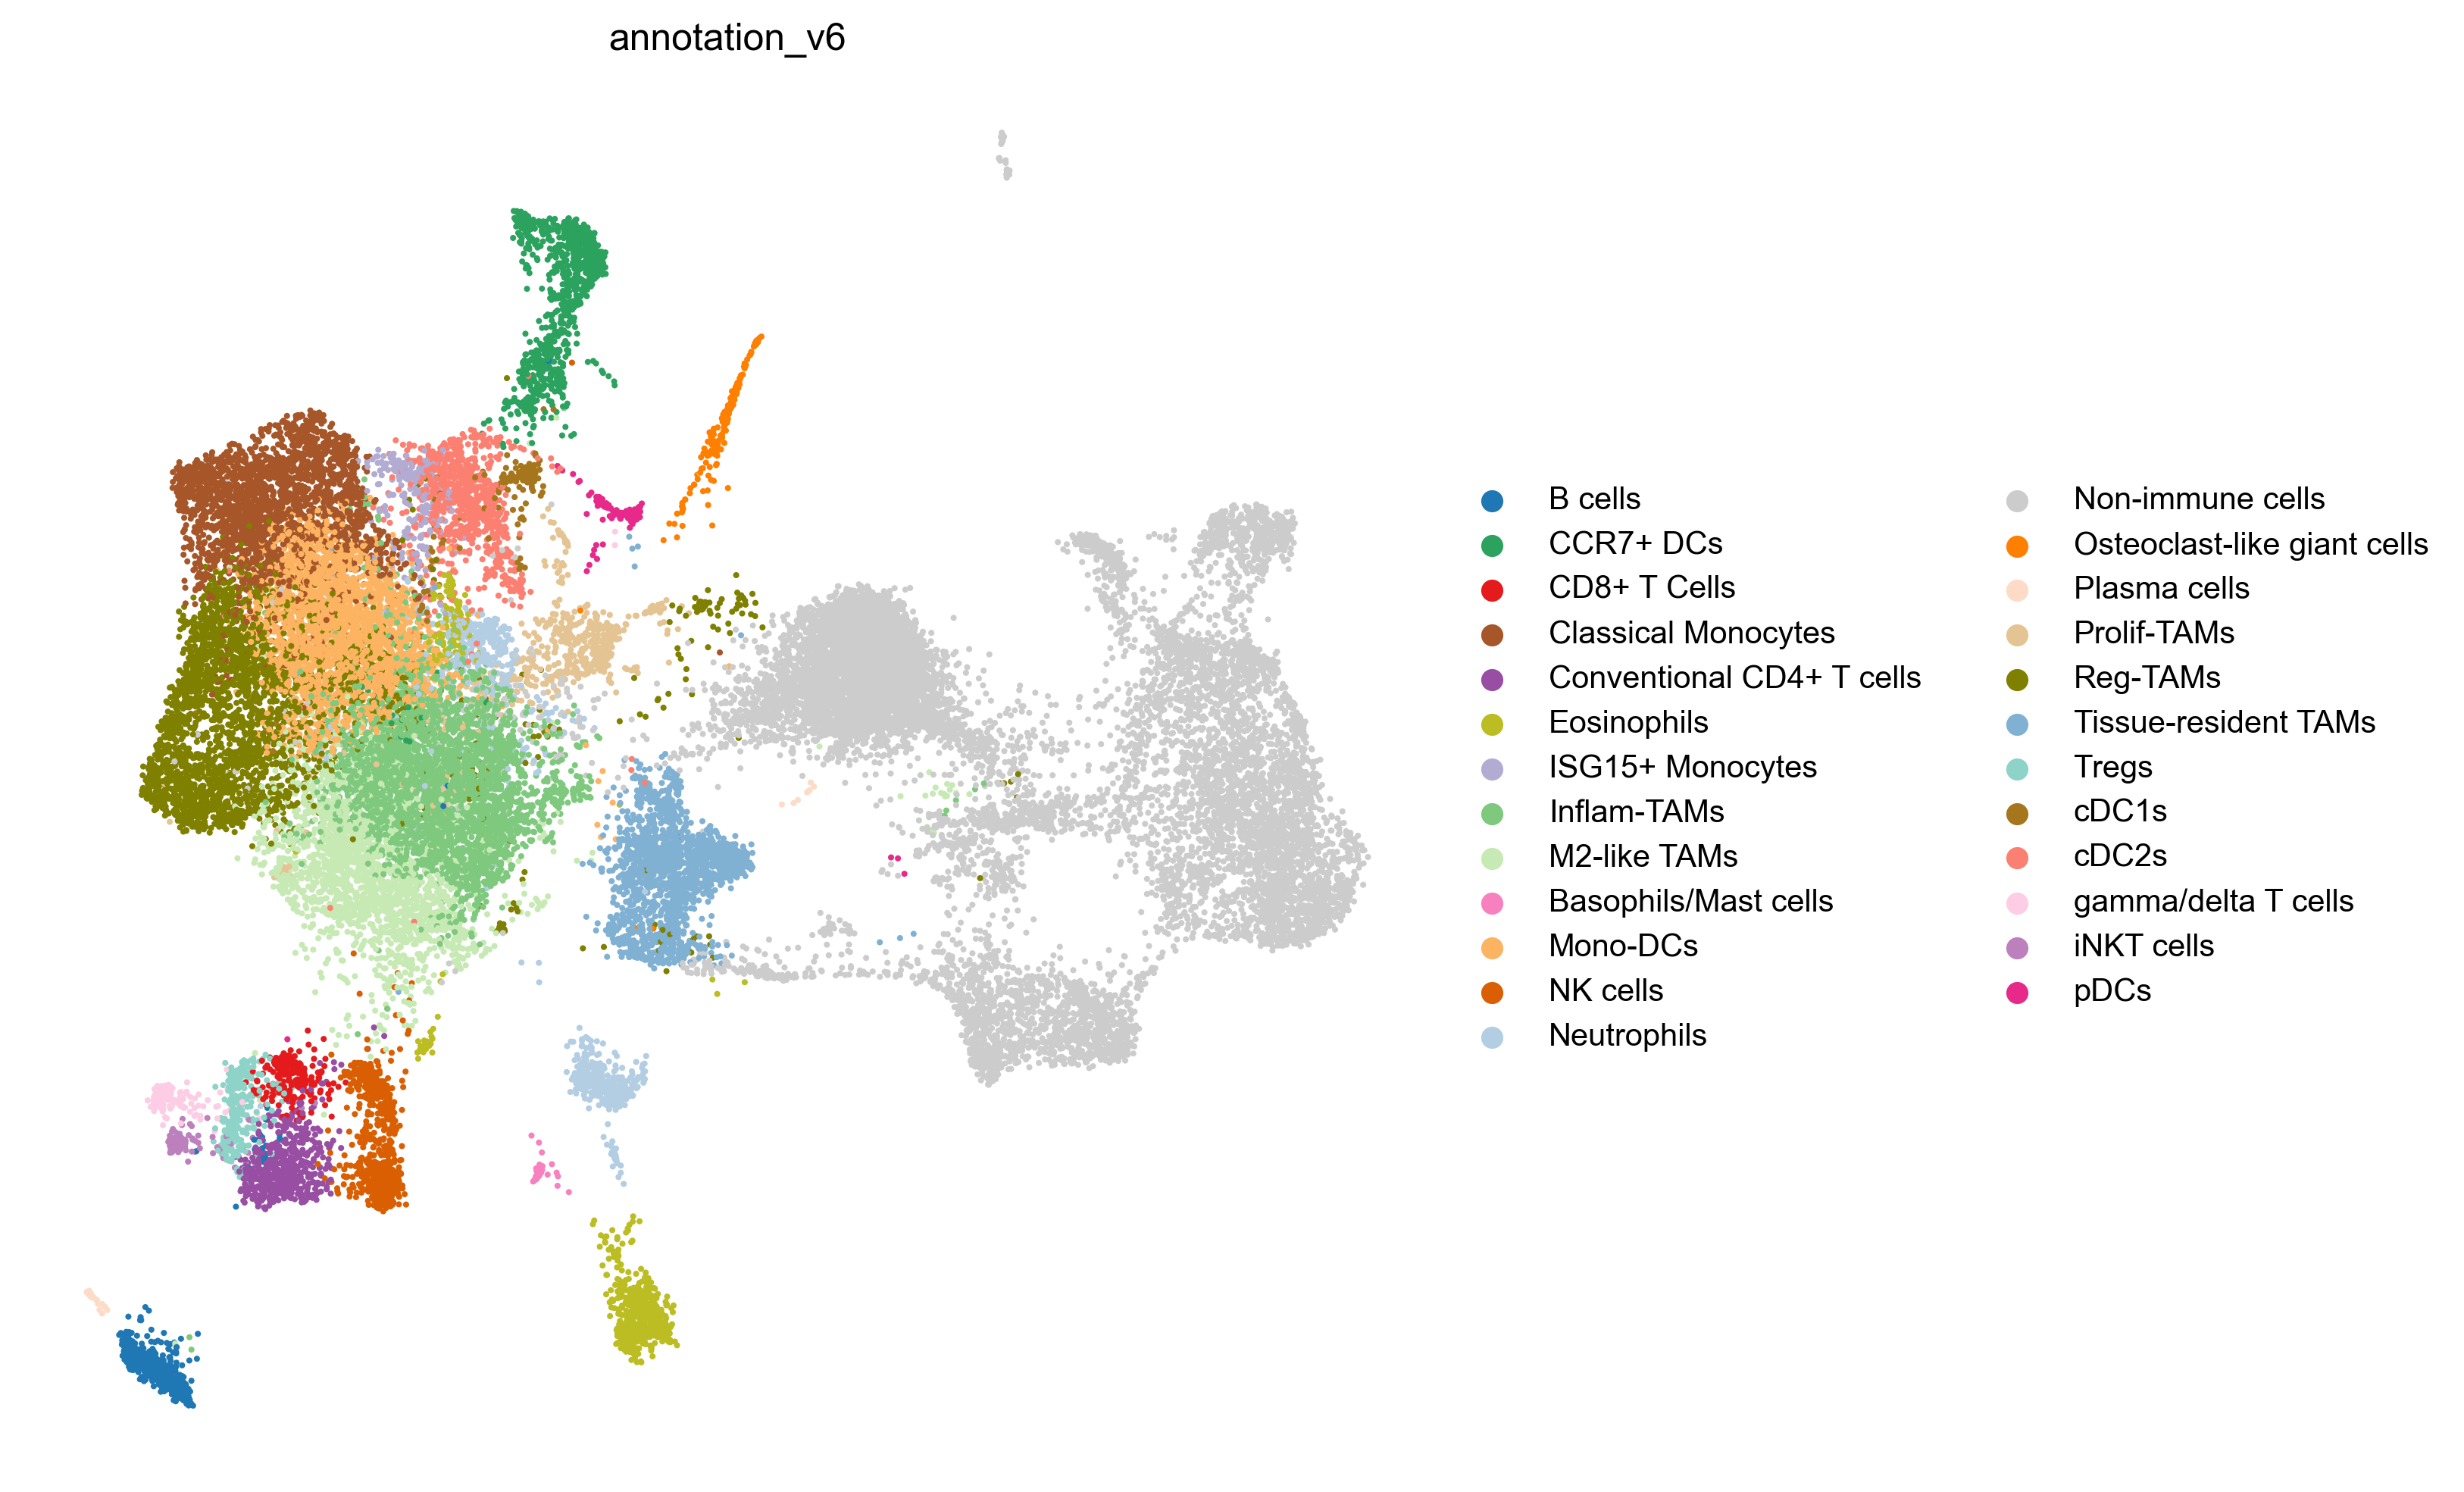

In [ ]:
adata.uns["annotation_v6_colors"] = [
    "#1f77b4",
    "#2ca25f",
    "#e41a1c",
    "#a65628",
    "#984ea3",
    "#bcbd22",
    "#b2abd2",
    "#7fc97f",
    "#c7e9b4",
    "#f781bf",
    "#fdb462",
    "#d95f02",
    "#b3cde3",
    "#cccccc",
    "#ff7f00",
    "#fddbc7",
    "#e5c494",
    "#7f7f00",
    "#80b1d3",
    "#8dd3c7",
    "#a6761d",
    "#fb8072",
    "#fccde5",
    "#bc80bd",
    "#e7298a",
]

sc.tl.umap(adata, min_dist=0.3, spread=1.1)

with plt.rc_context({"figure.figsize": (8, 8), "figure.dpi": (300)}):
    sc.pl.umap(
        adata,
        color="annotation_v6", 
        palette=adata.uns["annotation_v6_colors"], 
        size=15, 
        frameon=False, 
        save="_immunity_dc_revision_annotation_v6.png"
)

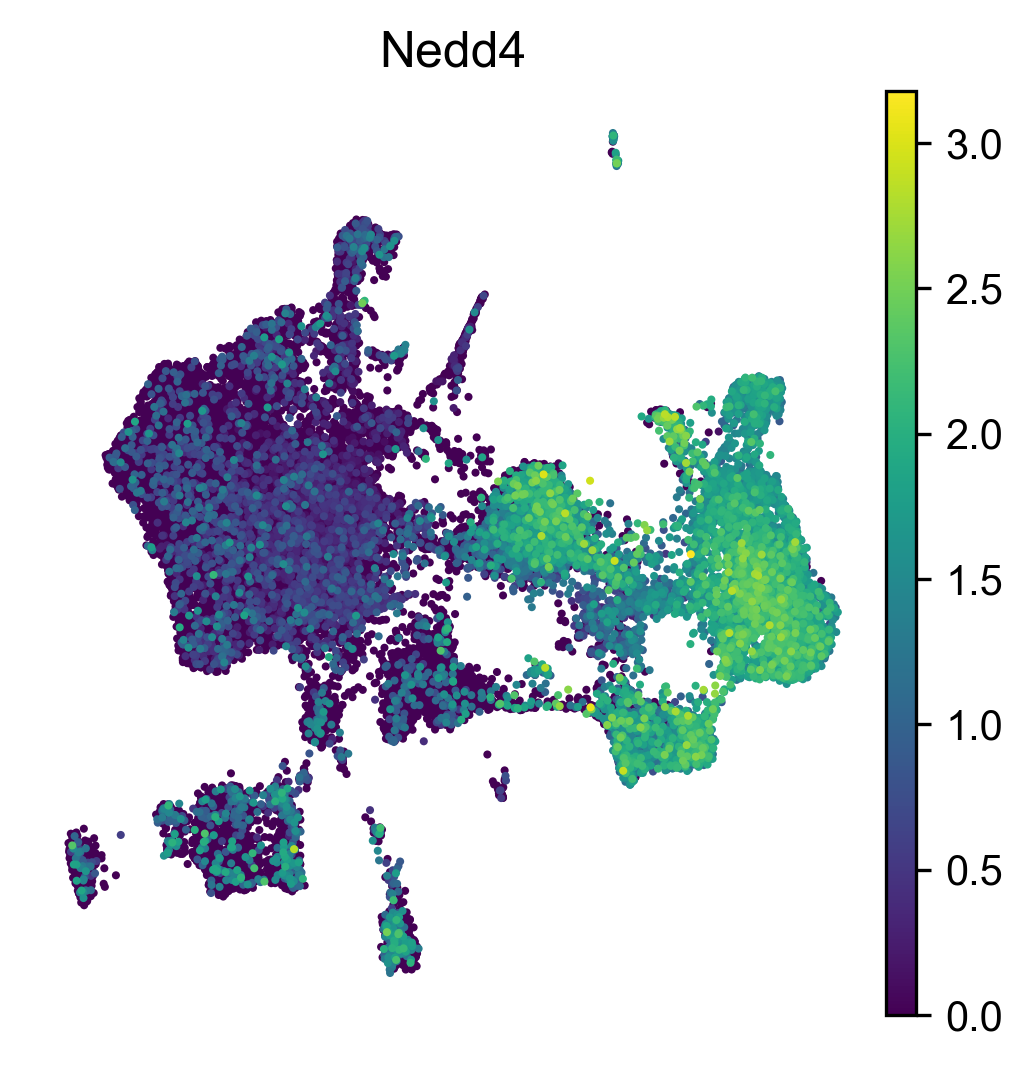

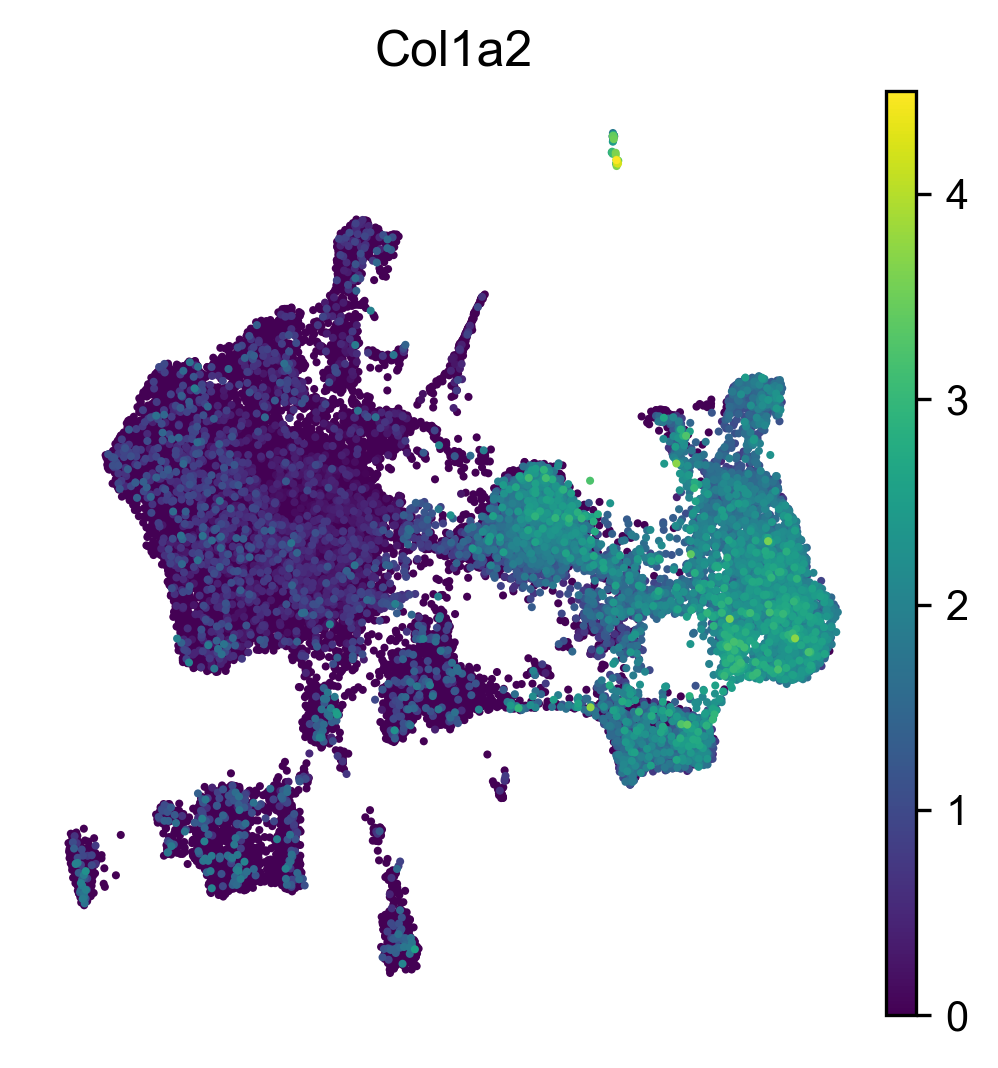

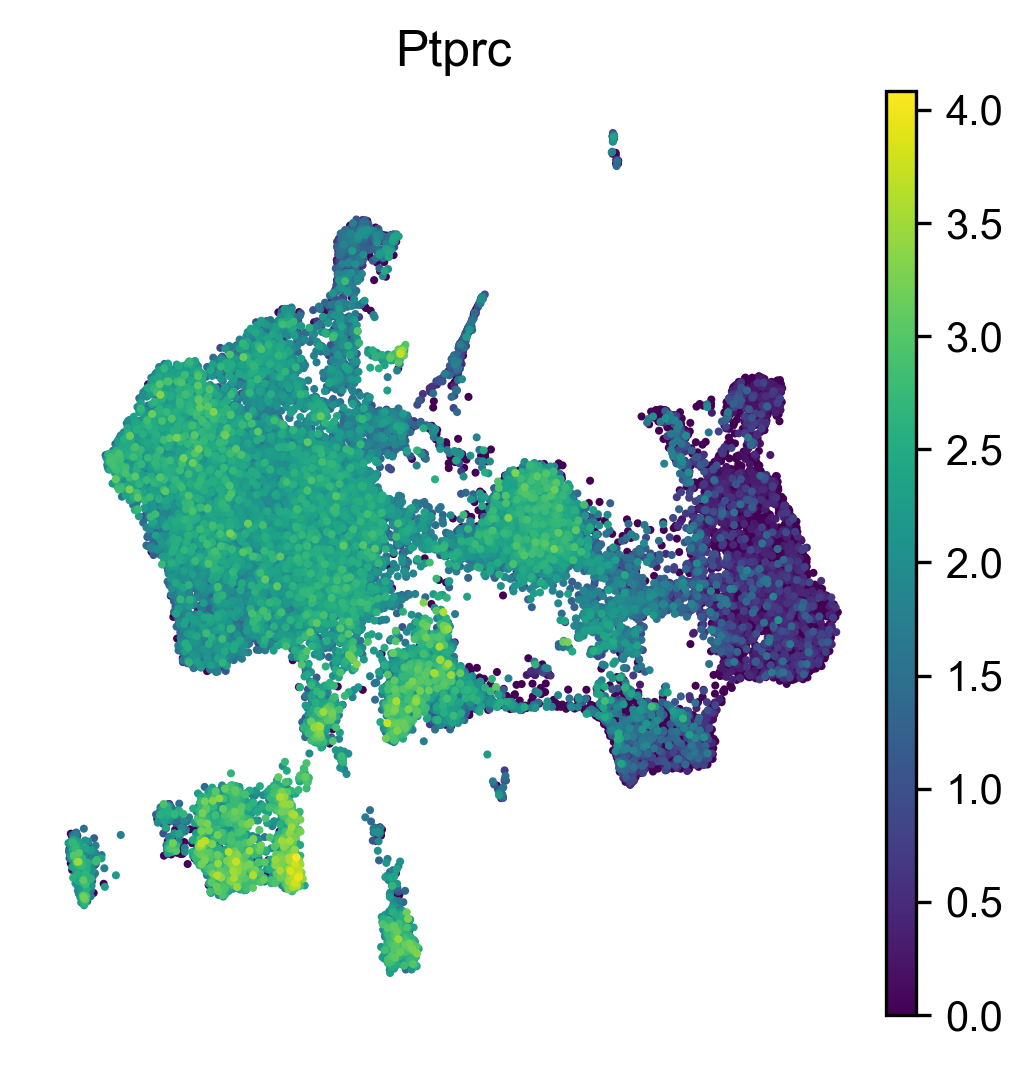

In [50]:
genes = ["Nedd4", "Col1a2", "Ptprc"]

for gene in genes:
    with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):
        sc.pl.umap(adata, color=gene, size=15, frameon=False, save=f"_immunity_dc_revision_{gene}.png")

In [59]:
for cell_type in adata.obs["annotation_v6"].cat.categories:
    print(f"Processing cell type: {cell_type}")
    adata_curr = adata[adata.obs["annotation_v6"] == cell_type]
    sc.tl.rank_genes_groups(adata_curr, groupby="genotype", method="wilcoxon")
    gene_groups = sc.get.rank_genes_groups_df(adata_curr, group = None)
    gene_groups_subset = gene_groups.groupby("group").head(100)
    cell_type = cell_type.replace(" ", "_").replace("$", "").replace("/", "_").replace("+", "pos").replace("-", "_").replace("^", "")
    print(f"Saving top 100 DEGs for {cell_type}...")
    if not os.path.exists('./per_cell_type_dge'):
        os.makedirs('./per_cell_type_dge')
    gene_groups_subset.to_csv(f'./per_cell_type_dge/top_100_degs_control_vs_ko_{cell_type}.csv')

Processing cell type: B cells


/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for B_cells...
Processing cell type: Basophils/Mast cells


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for Basophils_Mast_cells...
Processing cell type: CCR7$^+$ DCs


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for CCR7pos_DCs...
Processing cell type: CD8$^+$ T cells


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for CD8pos_T_cells...
Processing cell type: Classical Monocytes


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for Classical_Monocytes...
Processing cell type: Conventional CD4$^+$ T cells


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for Conventional_CD4pos_T_cells...
Processing cell type: Eosinophils


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for Eosinophils...
Processing cell type: ISG15$^+$ Monocytes


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for ISG15pos_Monocytes...
Processing cell type: Inflam-TAMs


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for Inflam_TAMs...
Processing cell type: M2-like TAMs


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for M2_like_TAMs...
Processing cell type: Mono-DCs


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for Mono_DCs...
Processing cell type: NK cells


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for NK_cells...
Processing cell type: Neutrophils


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for Neutrophils...
Processing cell type: Non-immune cells


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for Non_immune_cells...
Processing cell type: Osteoclast-like giant cells


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for Osteoclast_like_giant_cells...
Processing cell type: Plasma cells


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for Plasma_cells...
Processing cell type: Prolif-TAMs


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for Prolif_TAMs...
Processing cell type: Reg-TAMs


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for Reg_TAMs...
Processing cell type: Tissue-resident TAMs


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for Tissue_resident_TAMs...
Processing cell type: Tregs


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for Tregs...
Processing cell type: cDC1s


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for cDC1s...
Processing cell type: cDC2s


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for cDC2s...
Processing cell type: gamma/delta T cells


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for gamma_delta_T_cells...
Processing cell type: iNKT cells


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Saving top 100 DEGs for iNKT_cells...
Processing cell type: pDCs
Saving top 100 DEGs for pDCs...


/tmp/ipykernel_3871700/2885887380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_groups_subset = gene_groups.groupby("group").head(100)


In [ ]:

skipped_cell_types = []

for cell_type in adata.obs["annotation_v6"].cat.categories:
    print(f"Processing cell type: {cell_type}")
    adata_curr = adata[adata.obs["annotation_v6"] == cell_type]
    
    pdata = dc.get_pseudobulk(
        adata_curr,
        sample_col="sample_id",
        groups_col=None,
        layer="counts",
        mode="sum",
        min_cells=10,
        min_counts=1000
    )

    pdata.layers["counts"] = pdata.X.copy()

    sc.pp.normalize_total(pdata, target_sum=1e4)
    sc.pp.log1p(pdata)
    sc.pp.scale(pdata, max_value=10)
    sc.tl.pca(pdata)

    # Return raw counts to X
    dc.swap_layer(pdata, "counts", X_layer_key=None, inplace=True)

    metadata = pd.DataFrame(zip(pdata.obs.index, pdata.obs["genotype"]),
                            columns=['Sample', 'Condition'])
    metadata.set_index('Sample', inplace=True)
    counts = pd.DataFrame(pdata.X, index=pdata.obs.index, columns=pdata.var_names)

    dds = DeseqDataSet(counts=counts,
                       metadata=metadata,
                       design_factors="Condition")

    try:
        dds.deseq2()
    except ValueError as e:
        print(f"⚠️ Skipping {cell_type}: {e}")
        skipped_cell_types.append(cell_type)
        continue

    stat_res = DeseqStats(dds, alpha=0.05, cooks_filter=True,
                          independent_filter=True, contrast=('Condition', 'Control', 'KO'))

    stat_res.summary()

    res = stat_res.results_df

    # Sanitize cell type name for filename
    cell_type_safe = cell_type.replace(" ", "_").replace("$", "").replace("/", "_") \
                              .replace("+", "pos").replace("-", "_").replace("^", "")

    print(f"Saving top 100 DEGs for {cell_type_safe}...")
    os.makedirs('./per_cell_type_dge', exist_ok=True)
    res.to_csv(f'./per_cell_type_dge/dge_control_vs_ko_{cell_type_safe}.csv')

# Print summary of skipped types
if skipped_cell_types:
    print("\n⚠️ The following cell types were skipped due to insufficient data:")
    for ct in skipped_cell_types:
        print(f"- {ct}")
else:
    print("\n✅ All cell types processed successfully.")

Processing cell type: B cells


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.76 seconds.

Fitting dispersion trend curve...
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 1.86 seconds.

Fitting LFCs...
... done in 2.17 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.70 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610009B22Rik    0.288774        1.393993  3.104904  0.448965  0.653457   
0610009L18Rik    0.134814       -0.662684  3.753923 -0.176531  0.859877   
0610010K14Rik    1.901687        0.511094  1.081322  0.472657  0.636458   
0610030E20Rik    2.859329        0.699295  0.869147  0.804577  0.421064   
0610038B21Rik    0.257923       -1.565344  3.871248 -0.404351  0.685954   
...                   ...             ...       ...       ...       ...   
mt-Nd3          30.853101       -0.035880  0.291380 -0.123138  0.901998   
mt-Nd4         184.681947       -0.296647  0.242354 -1.224024  0.220943   
mt-Nd4l         26.316903       -0.171988  0.370945 -0.463649  0.642899   
mt-Nd5         119.975333        0.010267  0.227482  0.045132  0.964002   
mt-Nd6           3.905380       -0.570268  0.871750 -0.654165  0.513006   

                   padj  
0610009B22R

Fitting size factors...
... done in 0.00 seconds.



⚠️ Skipping Basophils/Mast cells: The number of samples and the number of design variables are equal, i.e., there are no replicates to estimate the dispersion. Please use a design with fewer variables.
Processing cell type: CCR7$^+$ DCs


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.90 seconds.

Fitting dispersion trend curve...
... done in 0.33 seconds.

Fitting MAP dispersions...
... done in 1.89 seconds.

Fitting LFCs...
... done in 1.94 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.52 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610005C13Rik    0.057866        0.667206  3.892666  0.171401  0.863909   
0610009B22Rik    3.929384        0.496022  0.730647  0.678880  0.497214   
0610009E02Rik    0.288752       -0.702971  2.707987 -0.259592  0.795179   
0610009L18Rik    1.330831        0.397354  1.267800  0.313420  0.753962   
0610010K14Rik   11.950800       -0.153230  0.561563 -0.272863  0.784958   
...                   ...             ...       ...       ...       ...   
mt-Nd3          81.294457        0.201469  0.258375  0.779752  0.435537   
mt-Nd4         450.818728        0.087147  0.206428  0.422165  0.672905   
mt-Nd4l         60.642807        0.292201  0.245188  1.191745  0.233361   
mt-Nd5         264.515174        0.215123  0.198606  1.083165  0.278735   
mt-Nd6           9.879460       -0.077524  0.524836 -0.147710  0.882572   

                   padj  
0610005C13R

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.05 seconds.

Fitting dispersion trend curve...
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.22 seconds.

Fitting MAP dispersions...
... done in 1.43 seconds.

Fitting LFCs...
... done in 1.34 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 0.75 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610009B22Rik   0.167335       -0.730819  2.619439 -0.278998  0.780246   
0610009L18Rik   0.212880       -0.730819  2.619439 -0.278998  0.780246   
0610010K14Rik   1.661338       -0.615471  1.141119 -0.539358  0.589640   
0610030E20Rik   1.799375       -2.509705  1.726984 -1.453230  0.146160   
0610040J01Rik   0.736188       -3.270393  2.991321 -1.093294  0.274265   
...                  ...             ...       ...       ...       ...   
mt-Nd3         11.620494        0.236492  0.484558  0.488057  0.625509   
mt-Nd4         63.592797       -0.013093  0.338473 -0.038684  0.969143   
mt-Nd4l        11.097588        0.651564  0.587672  1.108720  0.267551   
mt-Nd5         40.301289        0.373244  0.367179  1.016518  0.309383   
mt-Nd6          2.136941       -0.328153  1.456663 -0.225277  0.821764   

                   padj  
0610009B22Rik  0.999955

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.76 seconds.

Fitting dispersion trend curve...
... done in 0.33 seconds.

Fitting MAP dispersions...
... done in 1.88 seconds.

Fitting LFCs...
... done in 1.96 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.73 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610005C13Rik    0.133238        1.042927  3.875860  0.269083  0.787866   
0610009B22Rik    5.001425       -0.021252  0.646368 -0.032879  0.973771   
0610009E02Rik    1.536330        0.362255  1.117495  0.324167  0.745812   
0610009L18Rik    1.747678        0.658087  1.043792  0.630478  0.528382   
0610010K14Rik   16.295985        0.169384  0.409536  0.413599  0.679168   
...                   ...             ...       ...       ...       ...   
mt-Nd3         141.058737        0.313881  0.209738  1.496540  0.134513   
mt-Nd4         842.195790        0.131822  0.193349  0.681785  0.495375   
mt-Nd4l        122.212117        0.436336  0.223581  1.951581  0.050988   
mt-Nd5         487.428517        0.269841  0.197018  1.369631  0.170802   
mt-Nd6          15.207783        0.141337  0.381821  0.370166  0.711259   

                   padj  
0610005C13R

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.44 seconds.

Fitting dispersion trend curve...
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.23 seconds.

Fitting MAP dispersions...
... done in 1.91 seconds.

Fitting LFCs...
... done in 1.68 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.29 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610009B22Rik    0.055774        0.148792  3.247187  0.045822  0.963452   
0610009E02Rik    0.210060        0.870136  2.282500  0.381221  0.703040   
0610010K14Rik    0.324215        0.870136  2.297063  0.378804  0.704834   
0610030E20Rik    1.742854        2.064588  1.082887  1.906559  0.056578   
0610038B21Rik    0.265969        0.870136  2.283293  0.381088  0.703138   
...                   ...             ...       ...       ...       ...   
mt-Nd3          16.955178        0.077692  0.437728  0.177488  0.859125   
mt-Nd4         104.807740        0.057038  0.515040  0.110745  0.911818   
mt-Nd4l         13.659369       -0.267249  0.400403 -0.667449  0.504485   
mt-Nd5          51.924381       -0.176252  0.504178 -0.349582  0.726652   
mt-Nd6           3.313460        0.974434  0.740084  1.316653  0.187955   

                  padj  
0610009B22Ri

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 1.54 seconds.

Fitting dispersion trend curve...
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.25 seconds.

Fitting MAP dispersions...
... done in 2.01 seconds.

Fitting LFCs...
... done in 2.01 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.47 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610009B22Rik    0.200346       -1.438950  2.215685 -0.649438  0.516055   
0610009L18Rik    0.057311       -1.045067  2.737564 -0.381751  0.702646   
0610010K14Rik    1.216868        0.025633  0.956980  0.026785  0.978631   
0610030E20Rik    4.154673        0.961357  0.723669  1.328449  0.184030   
0610038B21Rik    0.058803       -1.055844  2.735856 -0.385928  0.699550   
...                   ...             ...       ...       ...       ...   
mt-Nd3          25.231411        1.056258  0.403582  2.617205  0.008865   
mt-Nd4         101.716337        0.999962  0.340744  2.934645  0.003339   
mt-Nd4l         11.977764        1.301195  0.561003  2.319409  0.020373   
mt-Nd5          46.954448        1.180561  0.510912  2.310691  0.020850   
mt-Nd6           3.142331        2.310745  0.851096  2.715022  0.006627   

                   padj  
0610009B22R

Fitting size factors...
... done in 0.11 seconds.

Fitting dispersions...
... done in 1.47 seconds.

Fitting dispersion trend curve...
... done in 0.25 seconds.

Fitting MAP dispersions...
... done in 1.61 seconds.

Fitting LFCs...
... done in 1.70 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.29 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610009B22Rik   0.955396       -0.736763  1.781403 -0.413586  0.679177   
0610009E02Rik   0.123378       -0.041548  4.205057 -0.009880  0.992117   
0610009L18Rik   0.126944        1.633181  4.119208  0.396479  0.691751   
0610010K14Rik   4.691706        0.169355  0.782278  0.216489  0.828606   
0610030E20Rik   4.462379        1.000744  0.846486  1.182233  0.237113   
...                  ...             ...       ...       ...       ...   
mt-Nd3         18.475483       -0.046149  0.468269 -0.098552  0.921494   
mt-Nd4         92.417140        0.007999  0.282441  0.028322  0.977405   
mt-Nd4l        14.276212       -0.445998  0.498112 -0.895377  0.370586   
mt-Nd5         62.843202        0.376367  0.287409  1.309518  0.190359   
mt-Nd6          2.333233        0.316701  1.171913  0.270243  0.786974   

                   padj  
0610009B22Rik  0.998864

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.93 seconds.

Fitting dispersion trend curve...
... done in 0.41 seconds.

Fitting MAP dispersions...
... done in 2.21 seconds.

Fitting LFCs...
... done in 2.45 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.06 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610005C13Rik     0.043814        1.657397  3.940928  0.420560  0.674076   
0610009B22Rik    15.961529        0.433720  0.450547  0.962650  0.335723   
0610009E02Rik     1.585539        0.178184  1.305680  0.136468  0.891451   
0610009L18Rik     4.386478        0.808397  0.775207  1.042814  0.297034   
0610010K14Rik    52.831567        0.406370  0.285045  1.425631  0.153975   
...                    ...             ...       ...       ...       ...   
mt-Nd3          568.097407        0.306911  0.162967  1.883272  0.059664   
mt-Nd4         2813.809744        0.140838  0.219531  0.641541  0.521171   
mt-Nd4l         347.492190        0.381306  0.177602  2.146972  0.031795   
mt-Nd5         1641.616699        0.281451  0.212107  1.326930  0.184532   
mt-Nd6           51.450638        0.070973  0.351933  0.201667  0.840177   

                   padj  

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.91 seconds.

Fitting dispersion trend curve...
... done in 0.39 seconds.

Fitting MAP dispersions...
... done in 2.00 seconds.

Fitting LFCs...
... done in 2.18 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.88 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610005C13Rik     0.017058       -1.030580  3.953777 -0.260657  0.794357   
0610009B22Rik     8.026782        1.074594  0.644204  1.668096  0.095297   
0610009E02Rik     1.670677        0.078628  1.243473  0.063232  0.949581   
0610009L18Rik     1.903142        0.171049  1.183967  0.144471  0.885129   
0610010K14Rik    30.457203       -0.204141  0.334907 -0.609544  0.542164   
...                    ...             ...       ...       ...       ...   
mt-Nd3          287.367383        0.202068  0.159977  1.263104  0.206552   
mt-Nd4         1412.029084        0.014468  0.204949  0.070591  0.943723   
mt-Nd4l         192.908353        0.009248  0.190354  0.048582  0.961252   
mt-Nd5          828.841653       -0.028294  0.155487 -0.181971  0.855606   
mt-Nd6           29.268480       -0.437289  0.368982 -1.185123  0.235969   

                   padj  

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.73 seconds.

Fitting dispersion trend curve...
... done in 0.36 seconds.

Fitting MAP dispersions...
... done in 1.94 seconds.

Fitting LFCs...
... done in 1.98 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.66 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610009B22Rik    10.620948       -0.155632  0.463242 -0.335962  0.736899   
0610009E02Rik     2.037706        0.277189  1.051699  0.263563  0.792116   
0610009L18Rik     2.578325       -0.196314  0.890660 -0.220414  0.825549   
0610010K14Rik    36.398576        0.424657  0.363461  1.168369  0.242658   
0610030E20Rik    41.159163       -0.091829  0.264938 -0.346606  0.728887   
...                    ...             ...       ...       ...       ...   
mt-Nd3          268.942014        0.344577  0.204680  1.683493  0.092280   
mt-Nd4         1404.132265        0.244038  0.236203  1.033172  0.301524   
mt-Nd4l         187.324660        0.380830  0.177344  2.147411  0.031761   
mt-Nd5          819.127455        0.399289  0.167156  2.388711  0.016908   
mt-Nd6           27.164603       -0.029891  0.361302 -0.082732  0.934064   

                   padj  

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.50 seconds.

Fitting dispersion trend curve...
... done in 0.27 seconds.

Fitting MAP dispersions...
... done in 1.71 seconds.

Fitting LFCs...
... done in 1.88 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.43 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610005C13Rik    0.055346       -0.482567  3.902182 -0.123666  0.901580   
0610009B22Rik    0.396808       -2.151543  2.596662 -0.828580  0.407342   
0610009L18Rik    0.207088        0.414557  3.139691  0.132037  0.894955   
0610010K14Rik    2.525846        1.303799  1.002792  1.300168  0.193543   
0610012D04Rik    0.096896        0.088938  3.783170  0.023509  0.981244   
...                   ...             ...       ...       ...       ...   
mt-Nd3          24.828094        0.036865  0.329442  0.111900  0.910903   
mt-Nd4         165.932252        0.047214  0.225093  0.209753  0.833860   
mt-Nd4l         25.638898       -0.012413  0.304449 -0.040772  0.967477   
mt-Nd5          95.239320        0.261069  0.210346  1.241138  0.214555   
mt-Nd6           4.807999        0.535175  0.670049  0.798711  0.424458   

                   padj  
0610005C13R

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.87 seconds.

Fitting dispersion trend curve...
... done in 0.31 seconds.

Fitting MAP dispersions...
... done in 1.85 seconds.

Fitting LFCs...
... done in 1.90 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.50 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610009B22Rik    1.137221        1.062746  1.396359  0.761084  0.446607   
0610009E02Rik    0.622224        1.394550  2.205685  0.632252  0.527222   
0610009L18Rik    0.676541        1.598398  1.966719  0.812723  0.416377   
0610010K14Rik    5.947529        0.999204  0.682323  1.464414  0.143081   
0610030E20Rik    8.733796        0.493991  0.495507  0.996939  0.318794   
...                   ...             ...       ...       ...       ...   
mt-Nd3          61.663120        0.215578  0.245615  0.877704  0.380104   
mt-Nd4         317.239926        0.157912  0.261922  0.602898  0.546577   
mt-Nd4l         41.291261        0.164660  0.272923  0.603318  0.546297   
mt-Nd5         184.519447        0.118134  0.235584  0.501450  0.616054   
mt-Nd6           5.430933        0.115988  0.643977  0.180113  0.857064   

                   padj  
0610009B22R

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 2.14 seconds.

Fitting dispersion trend curve...
... done in 0.45 seconds.

Fitting MAP dispersions...
... done in 2.66 seconds.

Fitting LFCs...
... done in 2.24 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.87 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610005C13Rik      0.881526        3.102669  2.515946  1.233202  0.217501   
0610009B22Rik     90.383125        0.193032  0.382031  0.505279  0.613363   
0610009E02Rik     23.403509        0.183462  0.363679  0.504462  0.613936   
0610009L18Rik     14.010184       -0.115713  0.477001 -0.242584  0.808328   
0610010K14Rik    296.241854        0.325319  0.355549  0.914978  0.360203   
...                     ...             ...       ...       ...       ...   
mt-Nd3          2301.910292       -0.172169  0.223998 -0.768619  0.442119   
mt-Nd4         12331.682577       -0.207929  0.297952 -0.697862  0.485263   
mt-Nd4l         1839.768490       -0.075202  0.189913 -0.395981  0.692119   
mt-Nd5          5059.155084       -0.035735  0.333324 -0.107209  0.914623   
mt-Nd6           297.905643       -0.113520  0.211747 -0.536115  0.591879   

             

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.74 seconds.

Fitting dispersion trend curve...
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 2.00 seconds.

Fitting LFCs...
... done in 1.79 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.68 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610009B22Rik    4.524378        0.632710  0.850944  0.743539  0.457155   
0610009E02Rik    0.757519        0.857793  1.990079  0.431035  0.666443   
0610009L18Rik    3.278367       -1.185659  1.166721 -1.016232  0.309519   
0610010K14Rik    6.979443        0.452825  0.697238  0.649456  0.516044   
0610030E20Rik    4.358241        1.000287  0.852014  1.174027  0.240384   
...                   ...             ...       ...       ...       ...   
mt-Nd3         120.549715        0.047435  0.286460  0.165590  0.868480   
mt-Nd4         699.878886       -0.236509  0.215937 -1.095266  0.273400   
mt-Nd4l        111.946934       -0.037409  0.262532 -0.142491  0.886692   
mt-Nd5         521.975713        0.020189  0.250406  0.080626  0.935739   
mt-Nd6          17.566749       -0.191292  0.436368 -0.438373  0.661116   

                   padj  
0610009B22R

Fitting size factors...
... done in 0.00 seconds.



⚠️ Skipping Plasma cells: The number of samples and the number of design variables are equal, i.e., there are no replicates to estimate the dispersion. Please use a design with fewer variables.
Processing cell type: Prolif-TAMs


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.74 seconds.

Fitting dispersion trend curve...
... done in 0.33 seconds.

Fitting MAP dispersions...
... done in 1.91 seconds.

Fitting LFCs...
... done in 1.89 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.41 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610005C13Rik    0.101479       -0.292707  3.807200 -0.076882  0.938717   
0610009B22Rik    5.902882       -0.441139  0.581597 -0.758497  0.448154   
0610009E02Rik    0.934881        0.031754  1.668994  0.019026  0.984821   
0610009L18Rik    0.244162       -0.982049  2.759177 -0.355921  0.721900   
0610010K14Rik   23.800802        0.177267  0.347482  0.510148  0.609948   
...                   ...             ...       ...       ...       ...   
mt-Nd3         130.115280        0.105645  0.210961  0.500781  0.616525   
mt-Nd4         635.723095        0.029378  0.127230  0.230901  0.817391   
mt-Nd4l         98.841110        0.248208  0.268607  0.924056  0.355457   
mt-Nd5         380.283029        0.440118  0.207531  2.120728  0.033945   
mt-Nd6           9.463030       -0.304476  0.544337 -0.559352  0.575922   

                   padj  
0610005C13R

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 2.01 seconds.

Fitting dispersion trend curve...
... done in 0.37 seconds.

Fitting MAP dispersions...
... done in 2.00 seconds.

Fitting LFCs...
... done in 2.12 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.64 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610005C13Rik     0.070942       -0.586689  3.889407 -0.150843  0.880100   
0610009B22Rik    14.332061        0.129564  0.483236  0.268118  0.788609   
0610009E02Rik     3.498529        0.685928  0.832926  0.823516  0.410214   
0610009L18Rik     2.024548        0.180379  1.145846  0.157420  0.874914   
0610010K14Rik    40.444426        0.349116  0.340490  1.025335  0.305205   
...                    ...             ...       ...       ...       ...   
mt-Nd3          381.462338        0.152425  0.145486  1.047692  0.294781   
mt-Nd4         1873.180547        0.153902  0.195015  0.789181  0.430006   
mt-Nd4l         262.007763        0.210776  0.156628  1.345714  0.178395   
mt-Nd5         1050.211781        0.302857  0.202063  1.498825  0.133919   
mt-Nd6           38.638127       -0.355347  0.276385 -1.285694  0.198550   

                   padj  

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.75 seconds.

Fitting dispersion trend curve...
... done in 0.32 seconds.

Fitting MAP dispersions...
... done in 1.79 seconds.

Fitting LFCs...
... done in 1.93 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.37 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610005C13Rik    0.246499        0.791738  2.800390  0.282724  0.777388   
0610009B22Rik    0.423095        0.410581  2.436238  0.168531  0.866166   
0610009E02Rik    0.908446        0.112657  1.966550  0.057286  0.954317   
0610009L18Rik    0.026218       -0.647778  3.932605 -0.164720  0.869165   
0610010K14Rik    2.690101       -0.488079  0.967201 -0.504630  0.613818   
...                   ...             ...       ...       ...       ...   
mt-Nd3          86.566824        0.232720  0.232680  1.000169  0.317228   
mt-Nd4         595.963370        0.210677  0.300073  0.702088  0.482625   
mt-Nd4l         80.364543        0.388760  0.235293  1.652239  0.098486   
mt-Nd5         316.404893        0.237575  0.194580  1.220966  0.222099   
mt-Nd6          15.897579       -0.180290  0.431100 -0.418209  0.675794   

                   padj  
0610005C13R

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.20 seconds.

Fitting dispersion trend curve...
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.23 seconds.

Fitting MAP dispersions...
... done in 1.73 seconds.

Fitting LFCs...
... done in 1.61 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.10 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610009B22Rik   0.027806       -0.340452  3.546930 -0.095985  0.923532   
0610010K14Rik   0.661442       -0.077643  1.499622 -0.051775  0.958708   
0610030E20Rik   0.693888        1.455992  1.612116  0.903156  0.366443   
0610040B10Rik   0.221184        0.825314  2.713445  0.304157  0.761008   
0610040F04Rik   0.229320        0.975764  2.579079  0.378338  0.705179   
...                  ...             ...       ...       ...       ...   
mt-Nd3          7.917809        0.373339  0.636974  0.586114  0.557799   
mt-Nd4         57.863018       -0.365171  0.480775 -0.759547  0.447525   
mt-Nd4l         9.854373        0.009054  0.486901  0.018596  0.985164   
mt-Nd5         33.715055        0.144780  0.391765  0.369558  0.711712   
mt-Nd6          1.771619        1.350962  1.066539  1.266679  0.205270   

                   padj  
0610009B22Rik  0.999963

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.44 seconds.

Fitting dispersion trend curve...
... done in 0.26 seconds.

Fitting MAP dispersions...
... done in 1.61 seconds.

Fitting LFCs...
... done in 1.69 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.36 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610009B22Rik    1.068457        0.496269  1.430016  0.347038  0.728563   
0610009E02Rik    0.144122       -0.678356  3.875094 -0.175055  0.861036   
0610009L18Rik    0.327049       -0.601192  2.616759 -0.229747  0.818289   
0610010K14Rik    2.989985       -0.802411  0.837907 -0.957637  0.338246   
0610030E20Rik    3.887750       -0.330202  0.772106 -0.427664  0.668896   
...                   ...             ...       ...       ...       ...   
mt-Nd3          28.507502        0.105952  0.338285  0.313204  0.754126   
mt-Nd4         114.924341        0.288033  0.209173  1.377005  0.168511   
mt-Nd4l         17.919847        0.044695  0.357105  0.125160  0.900397   
mt-Nd5          72.517478        0.501868  0.256279  1.958286  0.050197   
mt-Nd6           2.214012        1.106805  0.977843  1.131884  0.257683   

                   padj  
0610009B22R

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.71 seconds.

Fitting dispersion trend curve...
... done in 0.31 seconds.

Fitting MAP dispersions...
... done in 1.83 seconds.

Fitting LFCs...
... done in 1.88 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.52 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610005C13Rik    0.079041       -0.506171  3.870725 -0.130769  0.895958   
0610009B22Rik    3.734717        0.177801  0.766877  0.231850  0.816654   
0610009E02Rik    0.267592       -1.227520  2.984023 -0.411364  0.680805   
0610009L18Rik    0.981058       -0.679985  1.530851 -0.444187  0.656907   
0610010K14Rik   14.304577       -0.021369  0.436719 -0.048930  0.960975   
...                   ...             ...       ...       ...       ...   
mt-Nd3          74.877632        0.172197  0.211535  0.814035  0.415625   
mt-Nd4         374.639125        0.353911  0.183756  1.925987  0.054106   
mt-Nd4l         60.435260        0.248497  0.263555  0.942867  0.345749   
mt-Nd5         255.678583        0.295517  0.188162  1.570544  0.116288   
mt-Nd6           5.414113        0.518464  0.646173  0.802360  0.422345   

                   padj  
0610005C13R

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.04 seconds.

Fitting dispersion trend curve...
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.19 seconds.

/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/pydeseq2/dds.py:490: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 1.37 seconds.

Fitting LFCs...
... done in 1.46 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.27 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610009B22Rik   0.258353        0.469511  3.082673  0.152307  0.878945   
0610010K14Rik   0.888234        0.010949  1.864394  0.005872  0.995314   
0610030E20Rik   0.432463        1.137511  2.789624  0.407765  0.683446   
0610038B21Rik   0.082979       -0.383851  4.369579 -0.087846  0.929999   
0610040B10Rik   0.257090        0.469509  3.082356  0.152321  0.878933   
...                  ...             ...       ...       ...       ...   
mt-Nd3          8.589329       -0.132191  1.055532 -0.125236  0.900336   
mt-Nd4         42.140414        0.543732  0.496411  1.095327  0.273373   
mt-Nd4l         6.855717        0.650528  0.886141  0.734114  0.462879   
mt-Nd5         20.929196        0.956010  0.720227  1.327373  0.184385   
mt-Nd6          1.168838        0.728272  1.863202  0.390871  0.695892   

                   padj  
0610009B22Rik  0.994124

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.04 seconds.

Fitting dispersion trend curve...
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.15 seconds.

Fitting MAP dispersions...
... done in 1.15 seconds.

Fitting LFCs...
... done in 1.16 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.06 seconds.



Log2 fold change & Wald test p-value: Condition Control vs KO
                baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610030E20Rik   0.226231        0.120281  2.904124  0.041417  0.966963   
0610043K17Rik   0.151376       -0.841502  4.201698 -0.200277  0.841264   
1110002L01Rik   0.412135       -0.585287  2.193513 -0.266826  0.789603   
1110004F10Rik   0.987926        0.845832  1.852451  0.456601  0.647958   
1110019D14Rik   0.115832       -0.841502  4.201698 -0.200277  0.841264   
...                  ...             ...       ...       ...       ...   
mt-Nd3          3.476520        0.418411  0.859063  0.487055  0.626219   
mt-Nd4         15.313133       -0.196019  0.768838 -0.254955  0.798758   
mt-Nd4l         2.299325       -0.530571  0.947648 -0.559882  0.575560   
mt-Nd5          6.233079        0.322929  0.695092  0.464585  0.642229   
mt-Nd6          0.945087       -0.120615  2.412063 -0.050005  0.960118   

                   padj  
0610030E20Rik  0.983486

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.22 seconds.

Fitting dispersion trend curve...
/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.19 seconds.

/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/pydeseq2/dds.py:490: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 1.36 seconds.

Fitting LFCs...
... done in 1.50 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...


Log2 fold change & Wald test p-value: Condition Control vs KO
                baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610009B22Rik   0.700106       -0.512798  2.312899 -0.221712  0.824538   
0610010K14Rik   1.358834       -2.203779  2.225215 -0.990367  0.321995   
0610030E20Rik   2.370944        2.367695  1.822104  1.299429  0.193797   
0610040B10Rik   0.098473        0.077196  3.865097  0.019972  0.984065   
0610043K17Rik   0.370742        1.022575  3.207752  0.318782  0.749892   
...                  ...             ...       ...       ...       ...   
mt-Nd3         11.518984       -0.304454  0.905544 -0.336211  0.736712   
mt-Nd4         62.266218       -0.361012  0.686303 -0.526025  0.598871   
mt-Nd4l        11.337390       -0.074159  0.910512 -0.081448  0.935086   
mt-Nd5         40.100307       -0.331148  0.695804 -0.475922  0.634130   
mt-Nd6          0.658887       -0.158137  2.166090 -0.073006  0.941801   

                   padj  
0610009B22Rik  0.998246

... done in 1.32 seconds.



In [76]:
res

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610009B22Rik    0.288774        1.393993  3.104904  0.448965  0.653457   
0610009L18Rik    0.134814       -0.662684  3.753923 -0.176531  0.859877   
0610010K14Rik    1.901687        0.511094  1.081322  0.472657  0.636458   
0610030E20Rik    2.859329        0.699295  0.869147  0.804577  0.421064   
0610038B21Rik    0.257923       -1.565344  3.871248 -0.404351  0.685954   
...                   ...             ...       ...       ...       ...   
mt-Nd3          30.853101       -0.035880  0.291380 -0.123138  0.901998   
mt-Nd4         184.681947       -0.296647  0.242354 -1.224024  0.220943   
mt-Nd4l         26.316903       -0.171988  0.370945 -0.463649  0.642899   
mt-Nd5         119.975333        0.010267  0.227482  0.045132  0.964002   
mt-Nd6           3.905380       -0.570268  0.871750 -0.654165  0.513006   

                   padj  
0610009B22Rik  0.999917  
0610009L18Rik  0.999917  
0610010K14Rik  0.999917  
0610030E20Rik  0.999917  
0610038B21Rik  0.999917  
...                 ...  
mt-Nd3         0.999917  
mt-Nd4         0.999917  
mt-Nd4l        0.999917  
mt-Nd5         0.999917  
mt-Nd6         0.999917  

[14140 rows x 6 columns]

Processing cell type: B cells


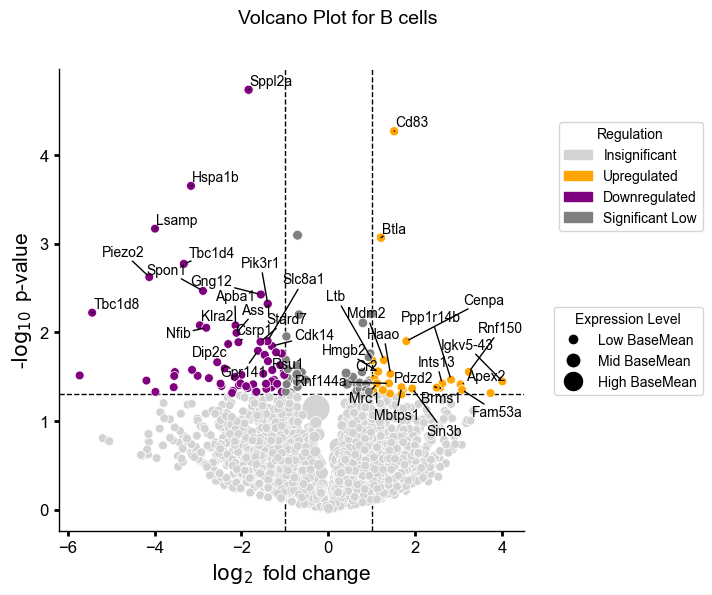

Processing cell type: Basophils/Mast cells
⚠️ No DE results found for Basophils/Mast cells. Skipping...
Processing cell type: CCR7$^+$ DCs


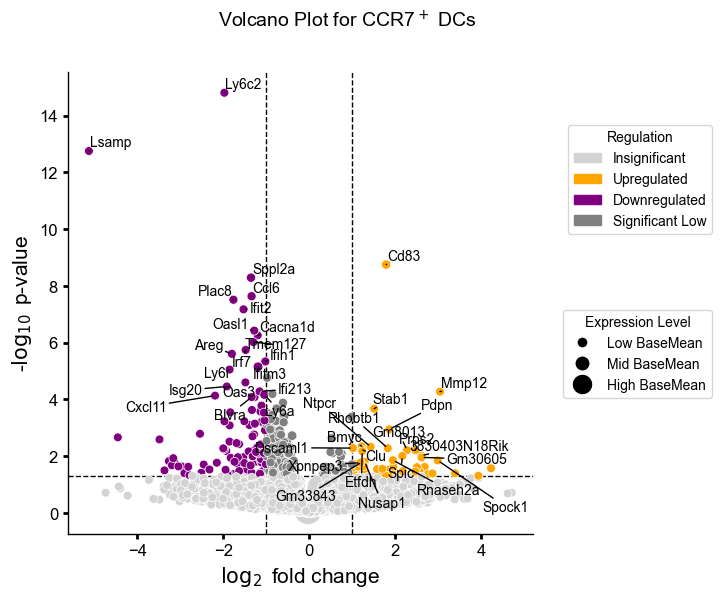

Processing cell type: CD8$^+$ T cells


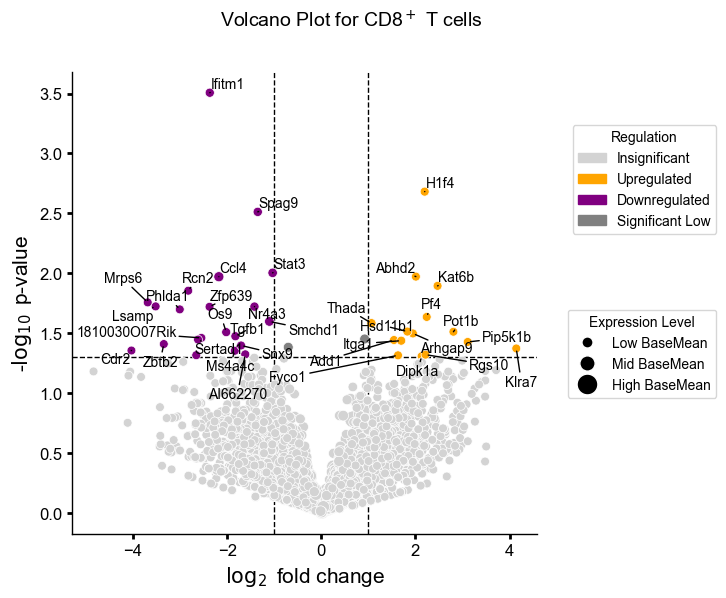

Processing cell type: Classical Monocytes


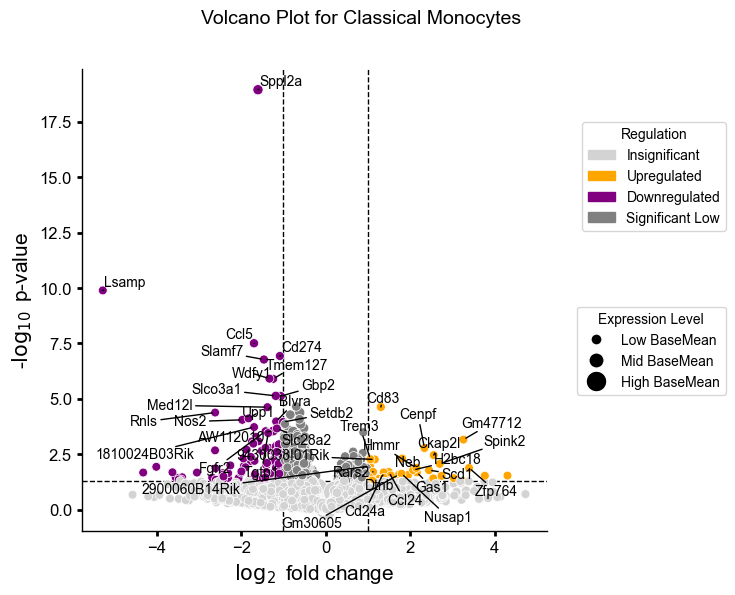

Processing cell type: Conventional CD4$^+$ T cells


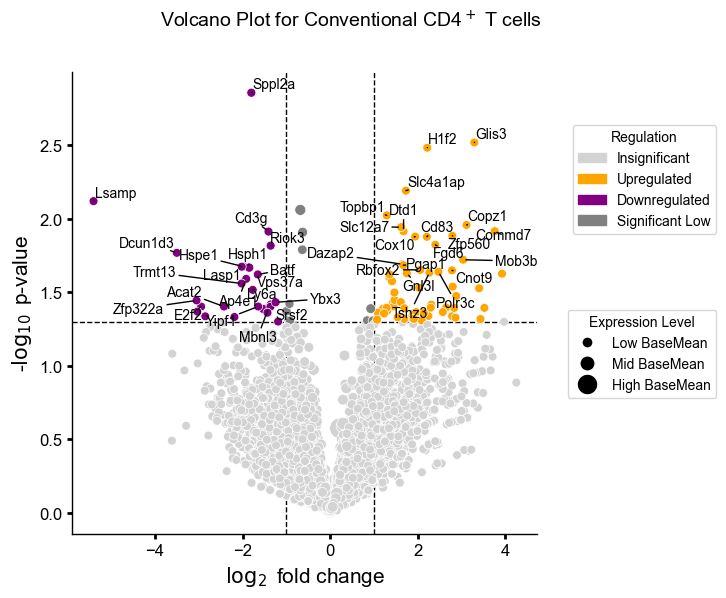

Processing cell type: Eosinophils


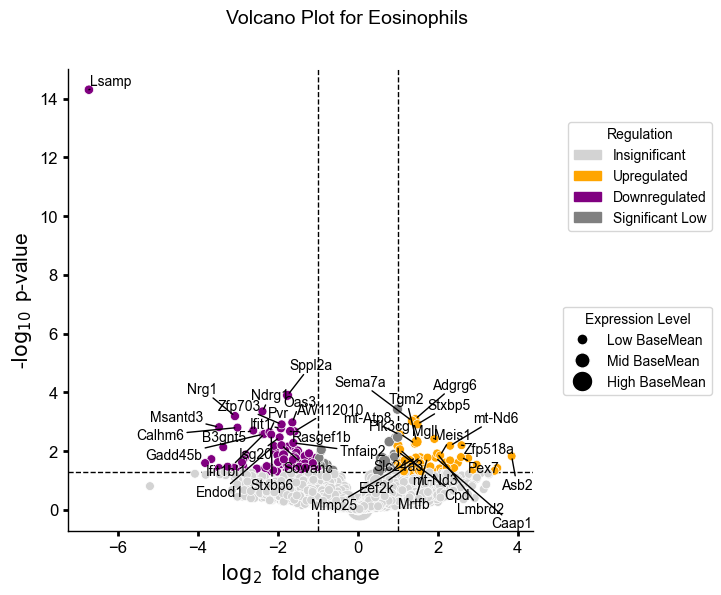

Processing cell type: ISG15$^+$ Monocytes


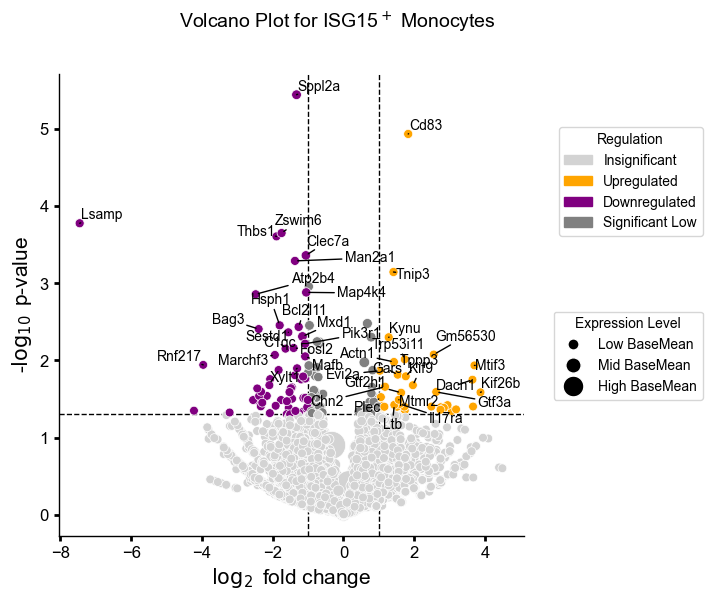

Processing cell type: Inflam-TAMs


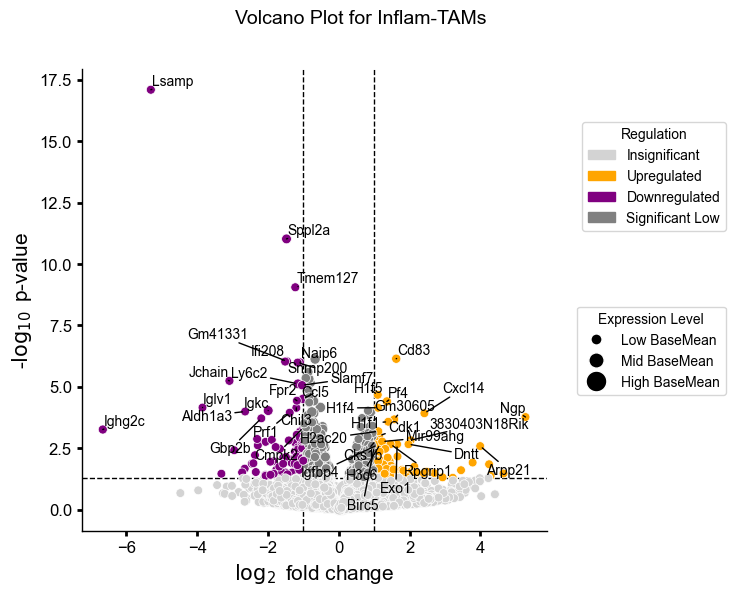

Processing cell type: M2-like TAMs


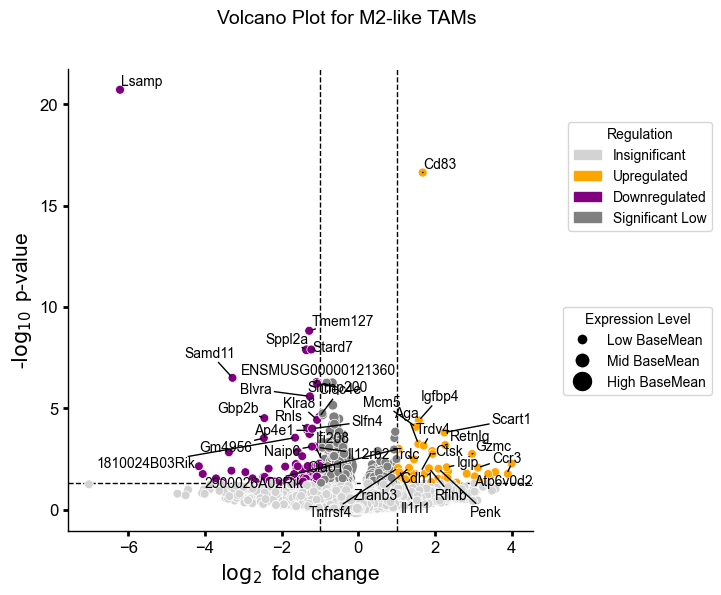

Processing cell type: Mono-DCs


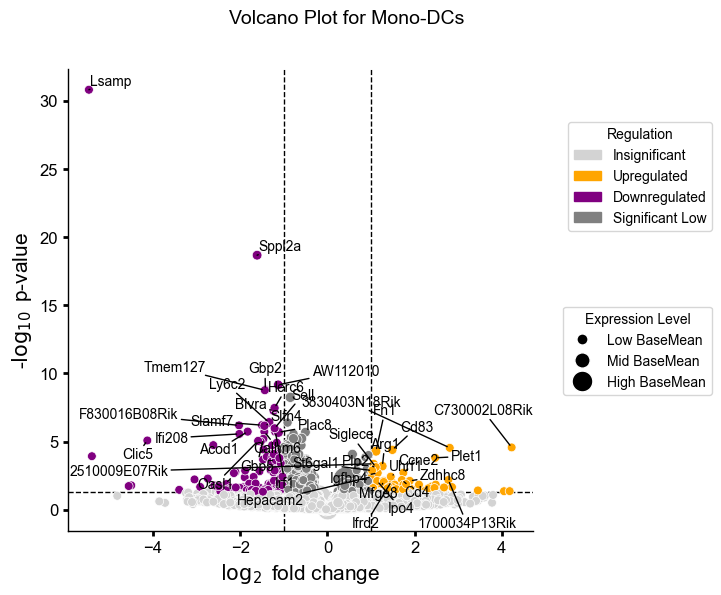

Processing cell type: NK cells


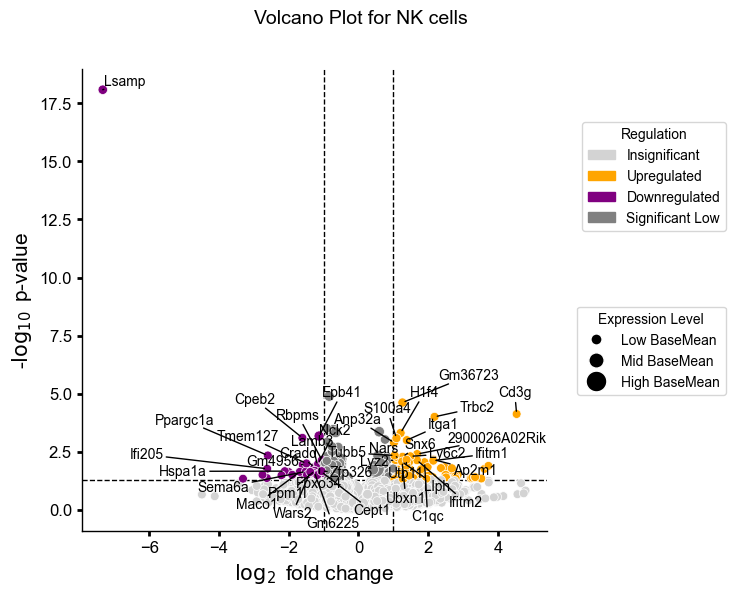

Processing cell type: Neutrophils


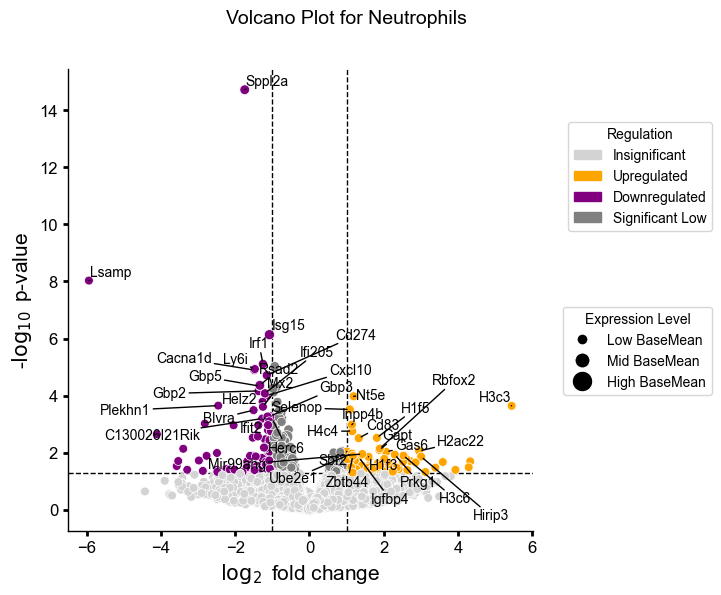

Processing cell type: Non-immune cells


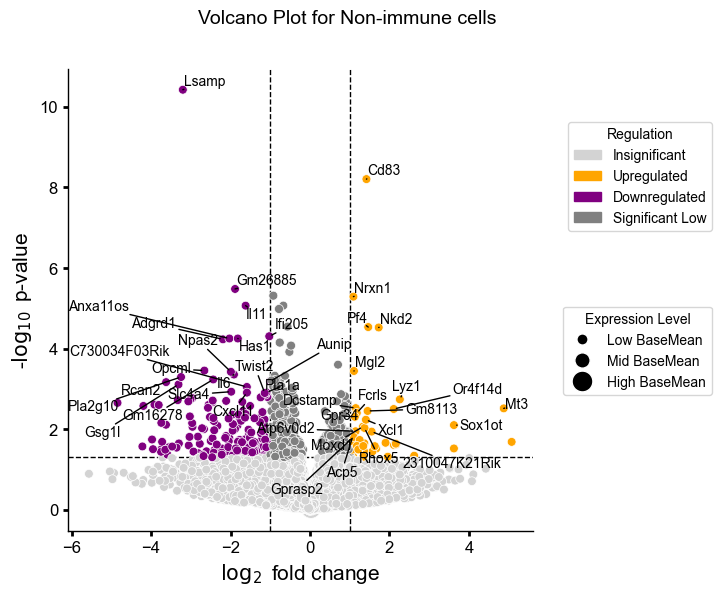

Processing cell type: Osteoclast-like giant cells


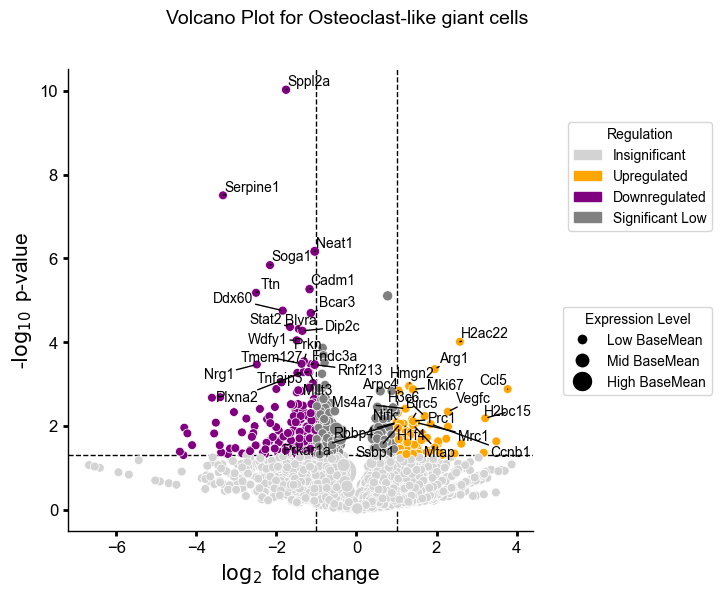

Processing cell type: Plasma cells
⚠️ No DE results found for Plasma cells. Skipping...
Processing cell type: Prolif-TAMs


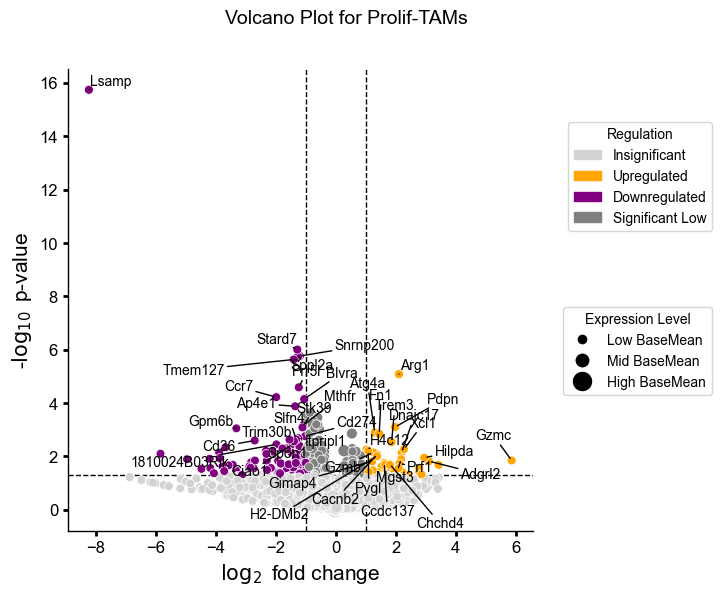

Processing cell type: Reg-TAMs


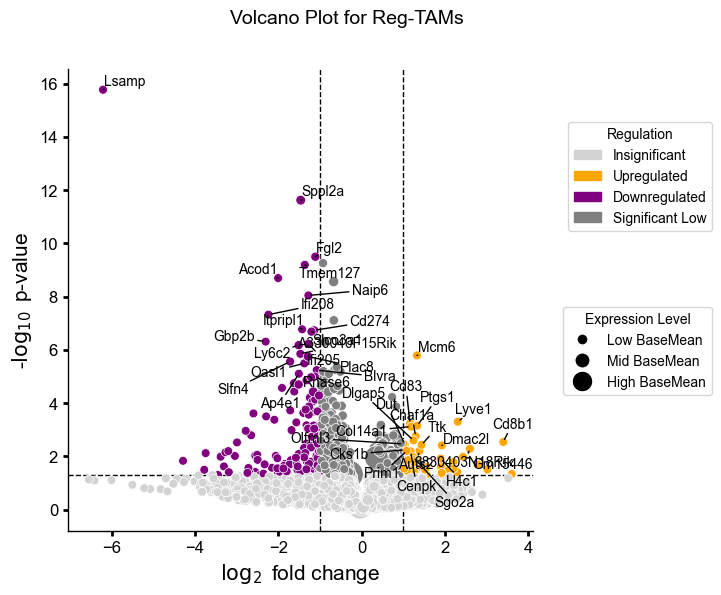

Processing cell type: Tissue-resident TAMs


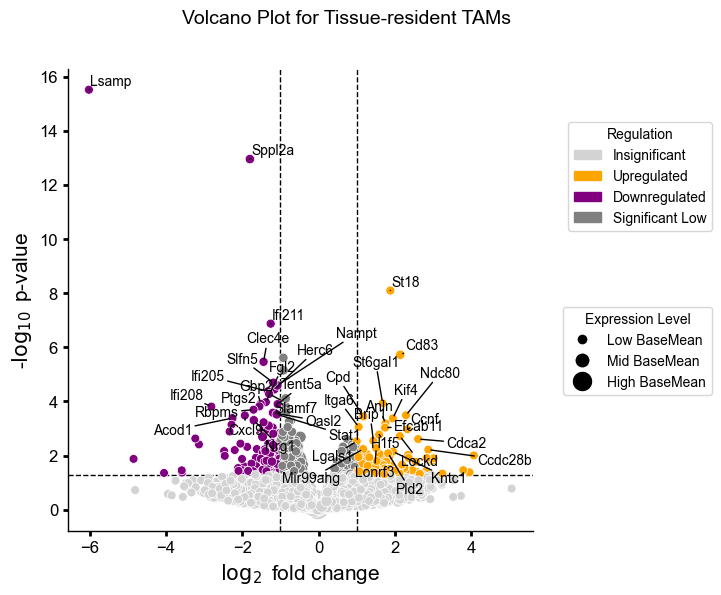

Processing cell type: Tregs


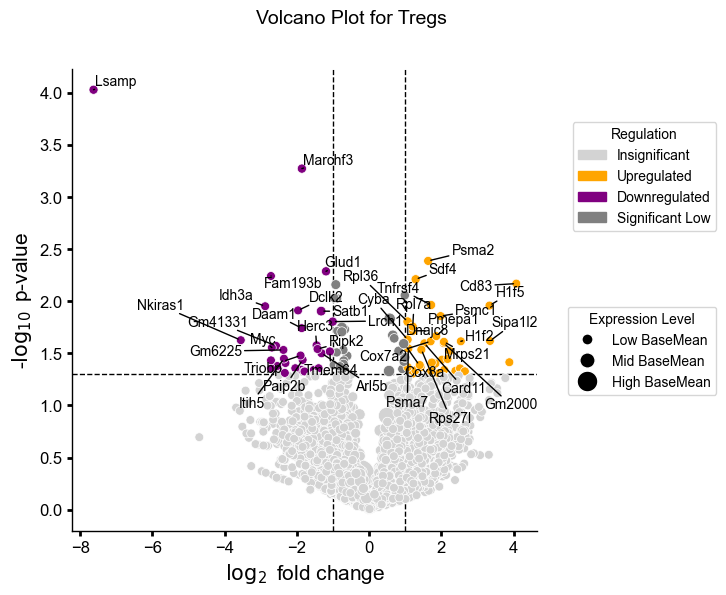

Processing cell type: cDC1s


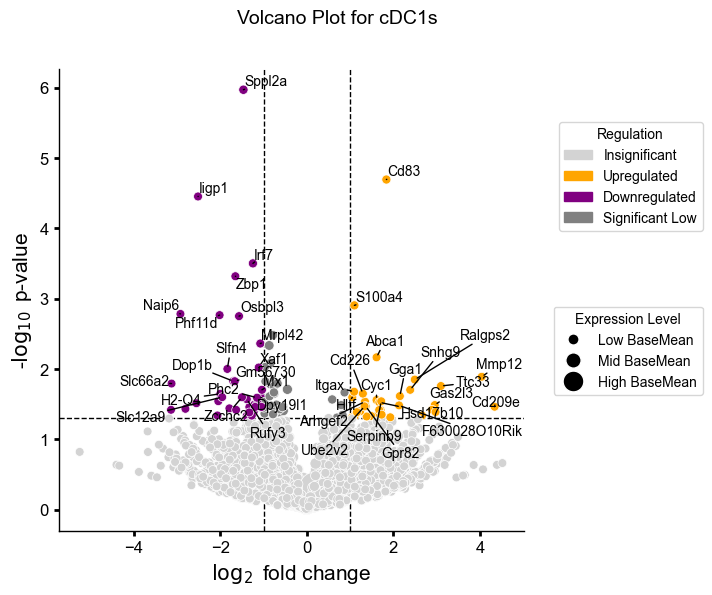

Processing cell type: cDC2s


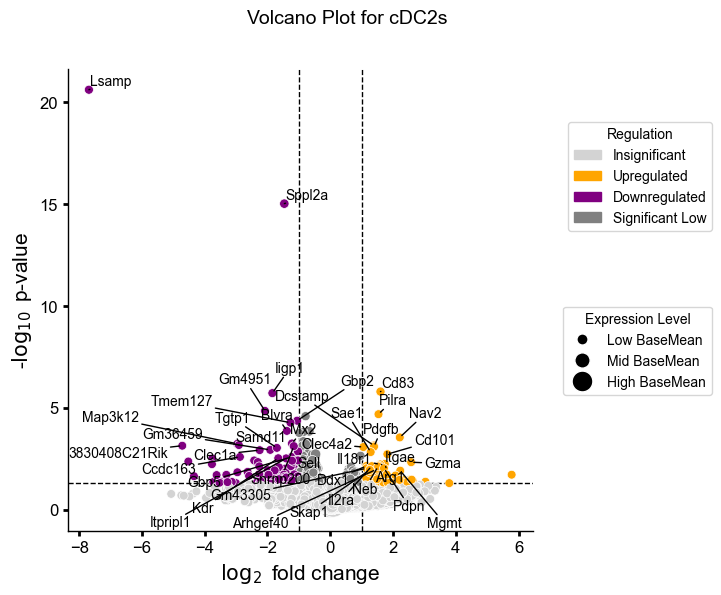

Processing cell type: gamma/delta T cells


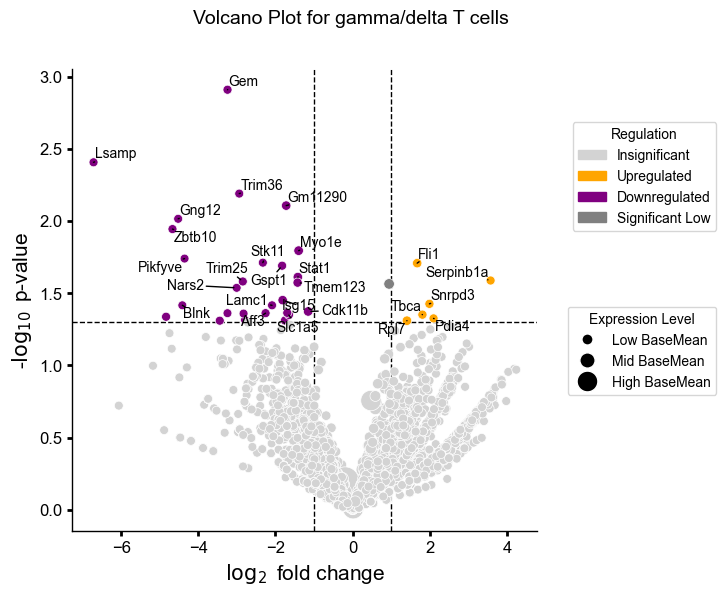

Processing cell type: iNKT cells


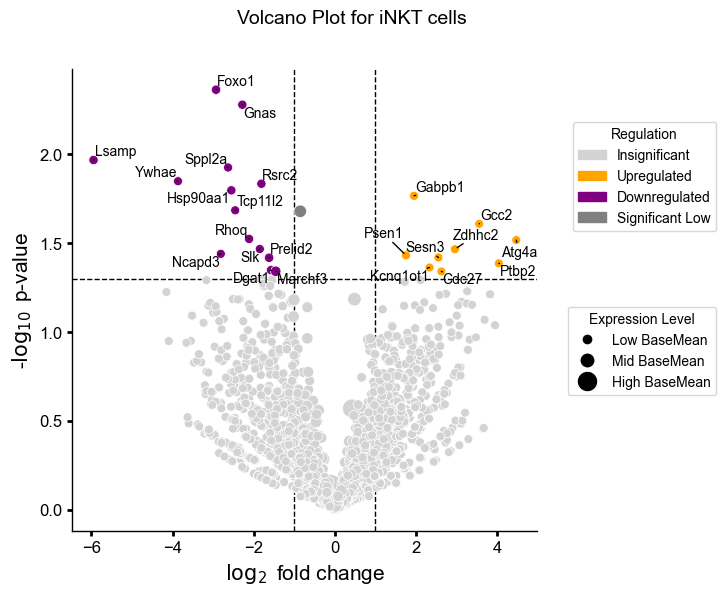

Processing cell type: pDCs


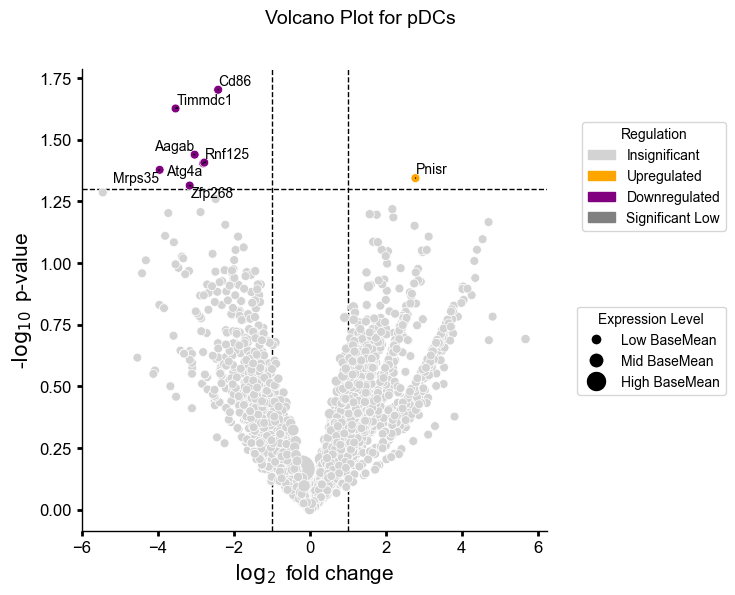

In [ ]:
def plot_volcano(res, picked3=None, picked4=None, title="Volcano Plot", outpath=None):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D
    from adjustText import adjust_text
    import os

    picked3 = set(picked3) if picked3 is not None else set()
    picked4 = set(picked4) if picked4 is not None else set()

    res = res.copy()
    res['nlog10'] = -np.log10(res.pvalue)
    res['symbol'] = res.index

    def map_color(a):
        log2FC, _, nlog10 = a
        if log2FC >= 1 and nlog10 >= 1.3:
            return 'upregulated'
        if log2FC <= -1 and nlog10 >= 1.3:
            return 'downregulated'
        if abs(log2FC) < 1 and nlog10 >= 1.3:
            return 'significant_low'
        return 'insignificant'

    res['color'] = res[['log2FoldChange', 'symbol', 'nlog10']].apply(map_color, axis=1)
    res = res.dropna(subset=['nlog10'])

    def map_shape(symbol):
        if symbol in picked3:
            return 'picked3'
        if symbol in picked4:
            return 'picked4'
        return 'not_important'

    res['shape'] = res.symbol.map(map_shape)

    top_up = res[(res.log2FoldChange >= 1) & (res.pvalue < 0.05)].nsmallest(20, 'pvalue')
    top_down = res[(res.log2FoldChange <= -1) & (res.pvalue < 0.05)].nsmallest(20, 'pvalue')
    annotate_genes = pd.concat([top_up, top_down])

    plt.figure(figsize=(6, 6))
    ax = sns.scatterplot(
        data=res,
        x='log2FoldChange', y='nlog10',
        hue='color',
        hue_order=['insignificant', 'upregulated', 'downregulated', 'significant_low'],
        palette=['lightgrey', 'orange', 'purple', 'grey'],
        size='baseMean', sizes=(40, 400),
        legend=False
    )

    ax.axhline(1.3, c='k', lw=1, ls='--', zorder=0)
    ax.axvline(1, c='k', lw=1, ls='--', zorder=0)
    ax.axvline(-1, c='k', lw=1, ls='--', zorder=0)

    texts = []
    for _, row in annotate_genes.iterrows():
        texts.append(plt.text(row.log2FoldChange, row.nlog10, row.symbol,
                              fontsize=10, weight='bold'))
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='k'))

    color_handles = [
        Patch(color='lightgrey', label='Insignificant'),
        Patch(color='orange', label='Upregulated'),
        Patch(color='purple', label='Downregulated'),
        Patch(color='grey', label='Significant Low')
    ]
    size_handles = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label='Low BaseMean'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=11, label='Mid BaseMean'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=15, label='High BaseMean')
    ]

    legend1 = ax.legend(handles=color_handles, title="Regulation",
                        loc="upper right", bbox_to_anchor=(1.4, 0.9),
                        title_fontproperties={'weight': 'bold'})
    ax.add_artist(legend1)
    legend2 = ax.legend(handles=size_handles, title="Expression Level",
                        loc="upper right", bbox_to_anchor=(1.4, 0.5),
                        title_fontproperties={'weight': 'bold'})

    # Styling
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(width=2)
    plt.xticks(size=12, weight='bold')
    plt.yticks(size=12, weight='bold')
    plt.xlabel("$\log_2$ fold change", size=15)
    plt.ylabel("-$\log_{10}$ p-value", size=15)
    plt.title(title, size=14, weight='bold', y=1.08, x=0.6)

    # Save figure
    if outpath:
        os.makedirs(os.path.dirname(outpath), exist_ok=True)
        plt.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')

    plt.show()

outpath = "/home/icb/raphael.kfuri-rubens/git/YummModel-sc/notebooks/immunity_sc_dc_analysis/per_cell_type_dge_volcano"

for cell_type in adata.obs["annotation_v6"].cat.categories:
    print(f"Processing cell type: {cell_type}")
    adata_curr = adata[adata.obs["annotation_v6"] == cell_type]

    cell_type_safe = cell_type.replace(" ", "_").replace("$", "").replace("/", "_") \
                              .replace("+", "pos").replace("-", "_").replace("^", "")
    res_path = f'./per_cell_type_dge/dge_control_vs_ko_{cell_type_safe}.csv'

    if not os.path.exists(res_path):
        print(f"⚠️ No DE results found for {cell_type}. Skipping...")
        continue

    res = pd.read_csv(res_path, index_col=0)

    picked3 = set()
    picked4 = set()

    plot_volcano(res, picked3=picked3, picked4=picked4, 
                 title=f"Volcano Plot for {cell_type}",
                 outpath=f"{outpath}/volcano_{cell_type_safe}.png")

In [84]:
marker_genes_dict = {
    "B_cells_and_Plasma_cells": [
        "Cd19", "Ighd", "Pax5", "Cd79a", "Igkc", "Igha", "Jchain", "Sec11c"
    ],
    "Basophils_and_Mast_cells": [
        "Gata2", "Cyp11a1", "Ccl3", "Mcpt8", "Cpa3", "Tpsb2", "Mcpt4", "Cma1"
    ],
    "Dendritic_cells": [
        "Zbtb46", "Flt3", "Ccr7", "Ccl22", "Fscn1", "Cd200", "Il12b", "Xcr1",
        "Clec9a", "Itgae", "Cd209a", "Clec10a", "Mgl2"
    ],
    "Monocytes": [
        "Plac8", "Lyz2", "Ly6c2", "Ccr2", "Sell", "Isg15", "Cxcl10", "Ifit2",
        "Ifit3", "Fcgr2b", "Fcgr3", "H2-Eb1", "H2-Ab1"
    ],
    "Eosinophils": [
        "Dach1", "Syne1", "Ccr3", "Siglecf"
    ],
    "T_cell_compartments": [
        "Itk", "Zbtb16", "Rora", "Cd8a", "Cd8b1", "Cd3e", "Cd3g", "Trdc",
        "Trgc4", "Foxp3", "Il10", "Ctla4", "Il2ra"
    ],
    "Neutrophils": [
        "S100a9", "S100a8", "Csf3r", "Cxcr2"
    ],
    "NK_cells": [
        "Klrb1c", "Ncr1", "Prf1", "Nkg7"
    ],
    "Non_immune_cells": [
        "Col3a1", "Col1a2", "Tpm1", "Sparc", "Nedd4", "Spp1", "Hmga2"
    ],
    "Osteoclast_like_cells": [
        "Acp5", "Mmp9", "Ctsk", "Trap1"
    ],
    "pDCs": [
        "Siglech", "Bcl11a", "Runx2", "Pacsin1", "Tcf4"
    ],
    "TAMs": [
        "Mrc1", "Apoe", "C1qa", "C1qb", "C1qc", "Mki67", "Cdk1", "Stmn1",
        "Cx3cr1", "Arg1", "Il1rn", "Cxcl2", "Il1b", "Ccl3", "Zeb2", "Lyn", "Slc8a1"
    ]
}

all_genes = [x for sublist in marker_genes_dict.values() for x in sublist]

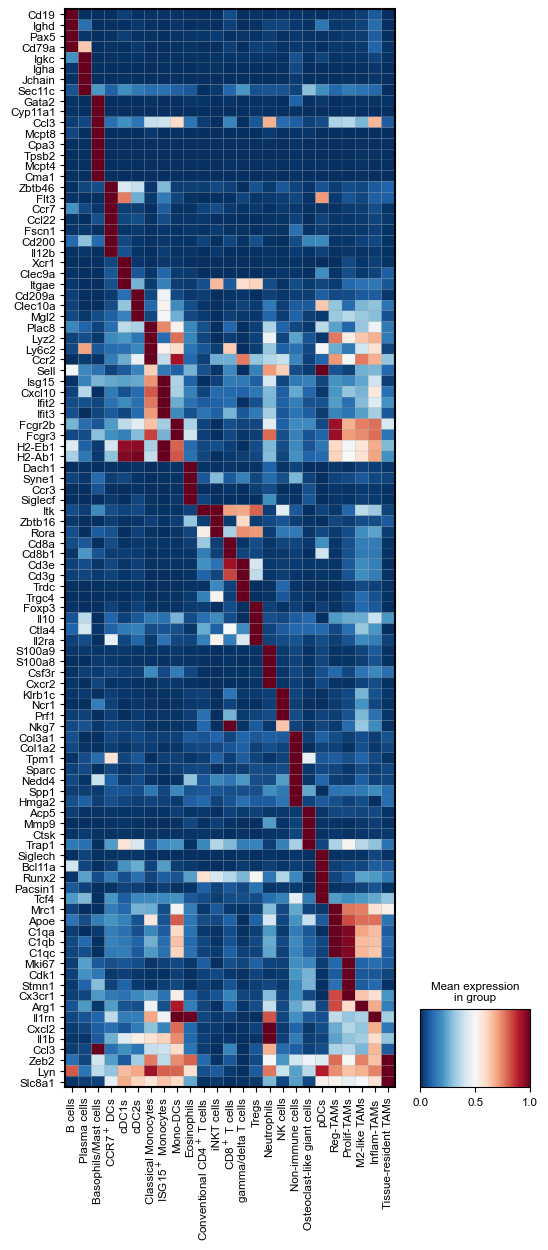

In [ ]:
cell_order = [
    'B cells', 'Plasma cells', 'Basophils/Mast cells',  'CCR7$^+$ DCs', 'cDC1s', 'cDC2s',
    'Classical Monocytes', 'ISG15$^+$ Monocytes', 'Mono-DCs', 'Eosinophils',
    'Conventional CD4$^+$ T cells',  'iNKT cells',  'CD8$^+$ T cells',
    'gamma/delta T cells', 'Tregs', 'Neutrophils', 'NK cells', 'Non-immune cells',
    'Osteoclast-like giant cells', 'pDCs', 'Reg-TAMs',  'Prolif-TAMs', 'M2-like TAMs',
    'Inflam-TAMs', 'Tissue-resident TAMs'
]

adata.obs["annotation_v6"] = adata.obs["annotation_v6"].cat.reorder_categories(cell_order, ordered=True)

sc.pl.matrixplot(
    adata,
    var_names=all_genes,
    groupby="annotation_v6",
    cmap="RdBu_r",
    dendrogram=False,
    figsize=(6, 14),
    swap_axes=True,
    standard_scale="var",
    save="marker_genes_matrixplot_vertical.png"
    #title="DC subtypes - YUMM1.7 - day 10"
)

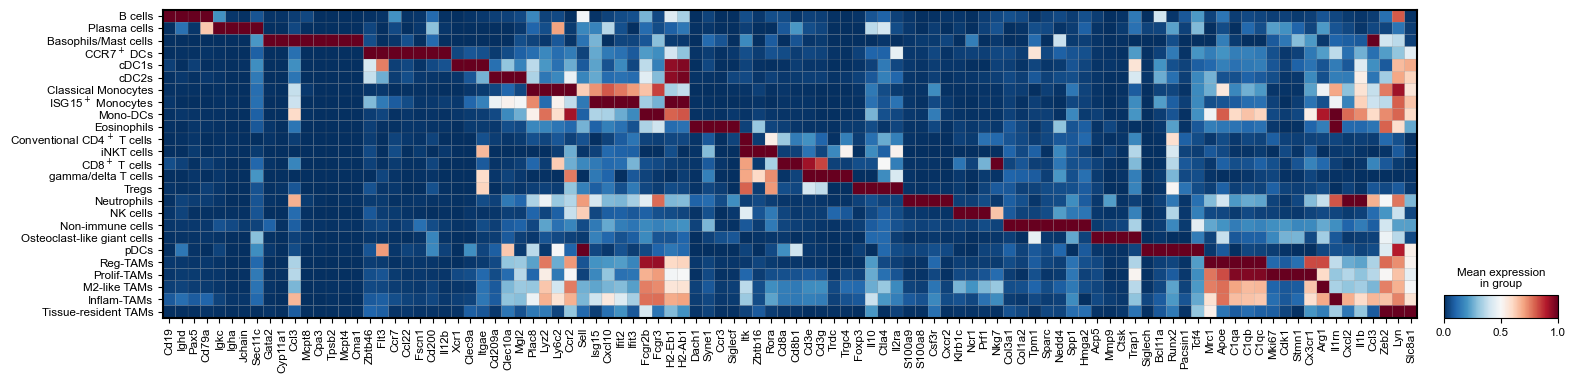

In [ ]:
sc.pl.matrixplot(
    adata,
    var_names=all_genes,
    groupby="annotation_v6",
    cmap="RdBu_r",
    dendrogram=False,
    figsize=(18, 4),
    swap_axes=False,
    standard_scale="var",
    save="marker_genes_matrixplot_horizontal.png"
)